<a href="https://colab.research.google.com/github/jeonjnh/python_stock_backtest/blob/main/Python_MACD_Bolinger_BAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기술적 분석 (TA : Technical Analysis)
- 과거 주가/거래량 데이터를 분석하여 시세를 예측
- 기본적 분석, 산업분석
  - 주식의 내재가치
  - 고/저평가
  - 재무제표 분석

- 중요가정!
  - 증권의 시가는 수요/공급으로 결정
  - 주가는 추세에 따라 움직임
  - **추세는 지속! 패턴은 반복!**

- 특징 (장단점)
  - 매매시점 포착에 좋음
  - 가정이 비현실적임
  - 그래서 왜 오름? 왜 내림? 에 대한 근본적 이유를 찾기 어려움

- 주로사용하는 보조지표
  - 이동평균선 : 단순이동평균 (SMA), 지수이동평균(EMA)
  - 이동평균 수렴확산
  - 볼린저밴드
  - 오실레이터 : 추세강도 과매수, 과매도 표시, 추세 지속여부



# 이동평균 수렴확신 (MACD : Moving Average Convergence Divergence)

- MACD 곡선 = 단기이동 평균 - 장기이동평균
  - 10일 ema - 20일 ema
  - 가격 변동에 상대적으로 빠르게 반응

- MACD 시그널 = MACA 곡선의 지수이동평균

- 매매신호 : MACD 곡선이 MACD 시그널을 상향/하향 돌파
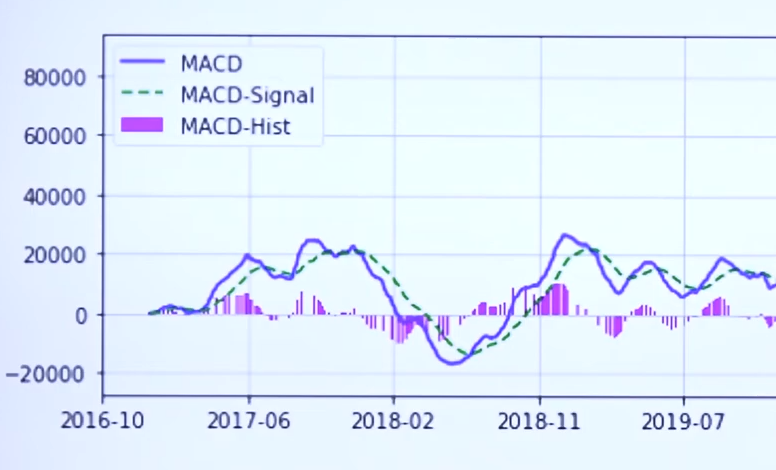

  - MACD Histogram = MACD - MACD-Sig
  - 히스토그램의 기울기 확인이 중요


# 볼린저 밴드

- 가정 : 주가의 확률분포를 표준정규분포로 가정
- 실제주가가 표준정규분포를 따르는가?
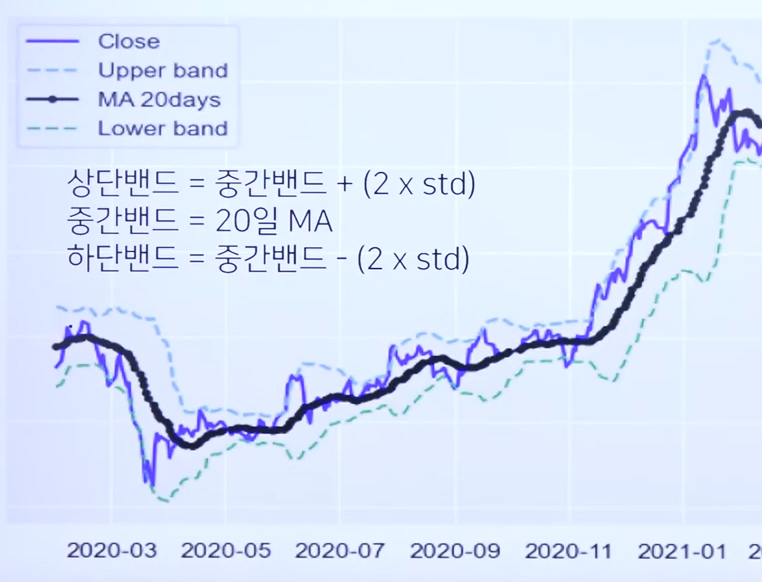

- 부가지표
  - %b : (close - lower band) / (upper band - lower band)
  - 주가가 밴드상 어디에 위치하고 있는지



- 볼린저 밴드 부가지표 - MFI
  - Money Flow Index = 100 - (100/(1+Money Flow Ratio))
  where:
  Money Flow Ratio
  Raw Money Flow = Typical price * volume
  Typical price = (high + low + close) / 3

# MACD
  1. MACD 곡선 : 12일 지수이평선 - 26일 지수이평선
  2. MACD 시그널 : MACD 곡선의 9일 지수 이평선
  3. MACD 히스토그램 : MACD 곡선 - MACD 시그널

In [ ]:
!pip install finance-datareader
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

In [ ]:
dct = dict(fdr.StockListing('KRX')[['Name', 'Code']].values)
json.dump(dct, open('/content/stock2code.json', 'w'))
stock2code = json.load(open('/content/stock2code.json', 'r'))

In [ ]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2015')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094
2015-01-06,47000,47600,46900,47500,1661196,-0.003148
2015-01-07,46700,47600,46700,47400,1821266,-0.002105
2015-01-08,48250,50000,47900,49950,5006675,0.053797
...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835
2024-01-02,139700,142800,139700,142400,2147458,0.006360
2024-01-03,140000,140800,136800,136800,3257820,-0.039326


In [ ]:
ewm12w = df.Close.ewm(span=60).mean() # 12 weeks 60 = 12*5
ewm26w = df.Close.ewm(span=130).mean() # 26 weeks 130 = 26*5

macdline = ewm12w - ewm26w
macdsign = macdline.ewm(span=45).mean() # macd line 의 9일 이동평균
macdhist = macdline- macdsign

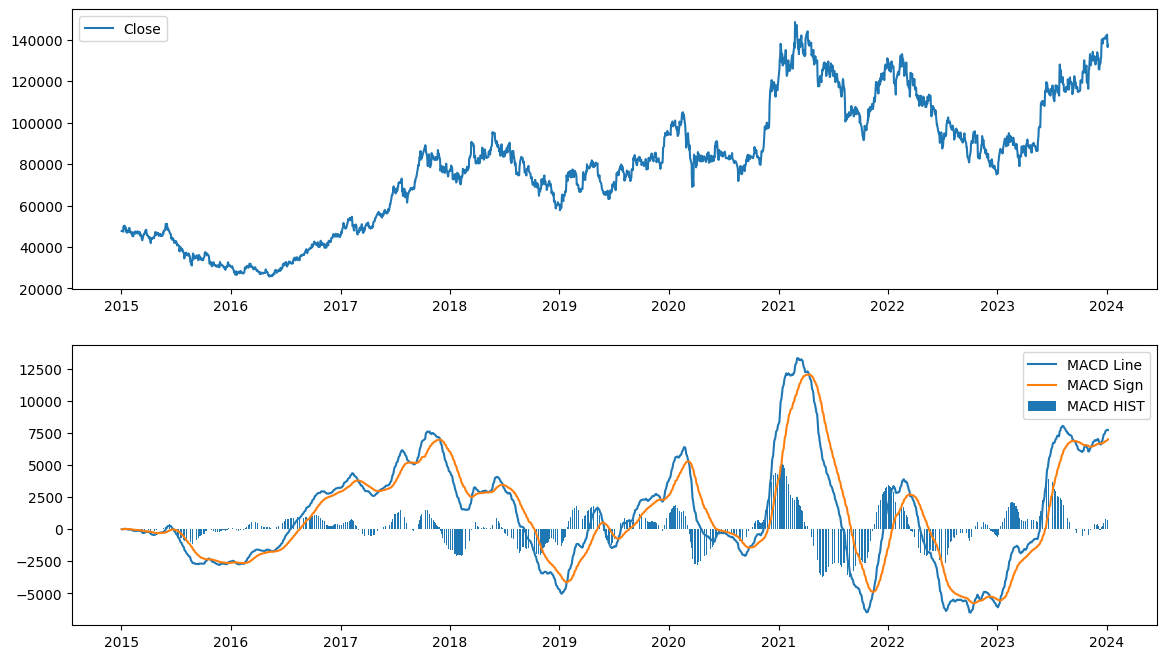

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(2,1,1)
plt.plot(df.Close, label='Close')
plt.legend()

plt.subplot(2,1,2)
plt.plot(macdline, label='MACD Line')
plt.plot(macdsign, label='MACD Sign')
plt.bar(macdhist.index, macdhist, label='MACD HIST')

plt.legend()
plt.show()

In [ ]:
total_df = pd.concat([df, ewm12w, ewm26w, macdline, macdsign, macdhist], axis=1).dropna()
total_df.columns = df.columns.tolist() + ['EWM12W', 'EWM26W', 'MACDLINE', 'MACDSIGN', 'MACDHIST']
total_df

,Open,High,Low,Close,Volume,Change,EWM12W,EWM26W,MACDLINE,MACDSIGN,MACDHIST
Date,,,,,,,,,,,
2015-01-02,47950,48400,47650,47750,1155944,0.000000,47750.000000,47750.000000,0.000000,0.000000,0.000000
2015-01-05,48050,48400,47500,47650,1409146,-0.002094,47699.166667,47699.615385,-0.448718,-0.229345,-0.219373
2015-01-06,47000,47600,46900,47500,1661196,-0.003148,47630.552727,47632.050650,-1.497923,-0.671134,-0.826789
2015-01-07,46700,47600,46700,47400,1821266,-0.002105,47570.001157,47572.692421,-2.691264,-1.210323,-1.480941
2015-01-08,48250,50000,47900,49950,5006675,0.053797,48078.254057,48062.895180,15.358877,2.404475,12.954402
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,129930.594365,122275.215385,7655.378980,6879.416671,775.962309
2024-01-02,139700,142800,139700,142400,2147458,0.006360,130339.427337,122582.464005,7756.963331,6917.570874,839.392458
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,130551.249391,122799.525624,7751.723768,6953.838391,797.885377


In [ ]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline(connected=True)

qplot = cf.QuantFig(total_df, title='MACD', legend='top', name='MACD')

In [ ]:
dir(qplot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_study',
 '_d',
 '_get_resampled',
 '_get_schema',
 '_get_sliced',
 '_get_study_figure',
 '_get_trendline',
 '_panel_domains',
 'add_adx',
 'add_annotations',
 'add_atr',
 'add_bollinger_bands',
 'add_cci',
 'add_dmi',
 'add_ema',
 'add_macd',
 'add_ptps',
 'add_resistance',
 'add_rsi',
 'add_shapes',
 'add_sma',
 'add_support',
 'add_trendline',
 'add_volume',
 'data',
 'delete',
 'df',
 'figure',
 'iplot',
 'kwargs',
 'layout',
 'panels',
 'studies',
 'theme',
 'trendlines',
 'update']

In [ ]:
qplot.add_ema(periods=130, column='Close', color='red')
qplot.add_volume(column='MACDHIST', name='MACD-HIST')
qplot.add_macd(60,130,45)
qplot.iplot()

# 볼린저 밴드

In [ ]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,96000,96200,94100,94700,2342070,0.006376
2020-01-03,96500,97900,94300,94500,3021380,-0.002112
2020-01-06,93000,95300,92800,94300,2577573,-0.002116
2020-01-07,94500,95400,94000,94000,2489429,-0.003181
2020-01-08,96400,99500,95200,97400,7014748,0.036170
...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835
2024-01-02,139700,142800,139700,142400,2147458,0.006360
2024-01-03,140000,140800,136800,136800,3257820,-0.039326


In [ ]:
df['MA20'] = df.Close.rolling(window=20).mean()
df['STD'] = df.Close.rolling(window=20).std()
df['UB'] = df.MA20 + df.STD * 2
df['LB'] = df.MA20 - df.STD * 2
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB
Date,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173
...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,134630.0,5911.994943,146453.989887,122806.010113
2024-01-02,139700,142800,139700,142400,2147458,0.006360,135055.0,6157.193055,147369.386110,122740.613890
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,135265.0,6140.656145,147546.312291,122983.687709


In [ ]:
df.index

DatetimeIndex(['2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05'],
              dtype='datetime64[ns]', name='Date', length=972, freq=None)

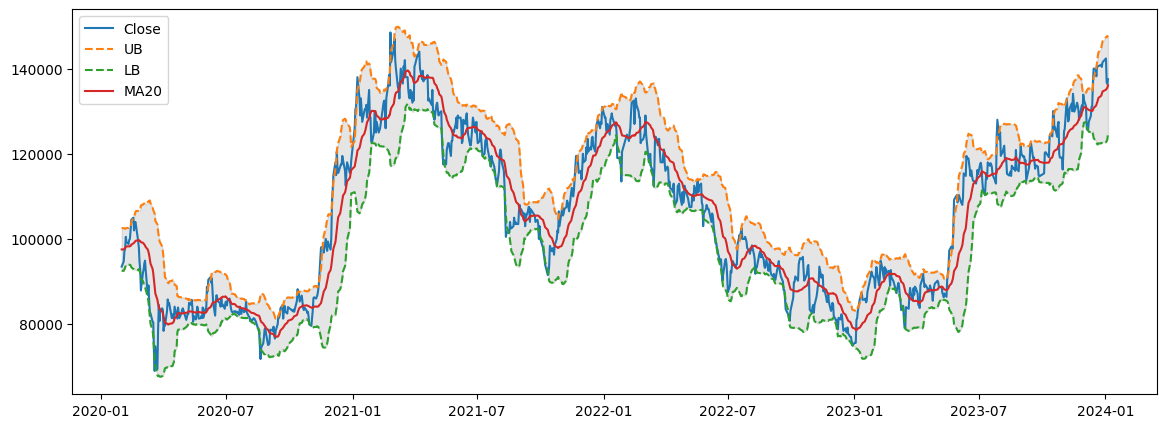

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='UB')
plt.plot(df.index, df.LB, linestyle='--', label='LB')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='gray', alpha=0.2)
plt.legend()
plt.show()

## 2.1 %b

In [ ]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df['MA20'] = df.Close.rolling(window=20).mean()
df['STD'] = df.Close.rolling(window=20).std()
df['UB'] = df.MA20 + df.STD * 2
df['LB'] = df.MA20 - df.STD * 2
df['pct_b'] = (df.Close - df.LB) / (df.UB - df.LB)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b
Date,,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474,0.097586
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474,0.217115
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569,0.440857
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988,0.484618
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173,0.770348
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,134630.0,5911.994943,146453.989887,122806.010113,0.790511
2024-01-02,139700,142800,139700,142400,2147458,0.006360,135055.0,6157.193055,147369.386110,122740.613890,0.798228
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,135265.0,6140.656145,147546.312291,122983.687709,0.562493


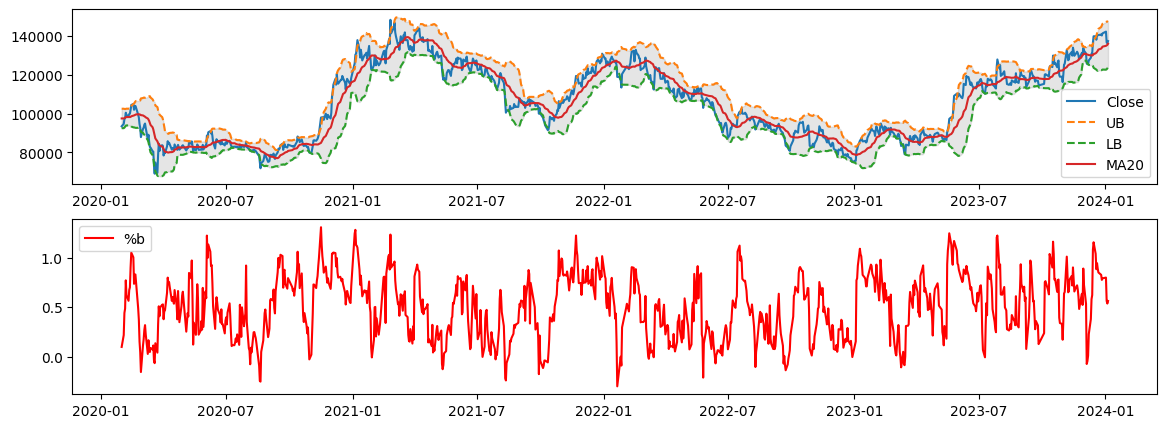

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='UB')
plt.plot(df.index, df.LB, linestyle='--', label='LB')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='gray', alpha=0.2)
plt.legend()

plt.subplot(212)
plt.plot(df.index, df.pct_b, label='%b', color='red')
plt.legend()

plt.show()

## 2.2 Band Width
- 주가의 변동폭이 클때 밴드폭이 커짐

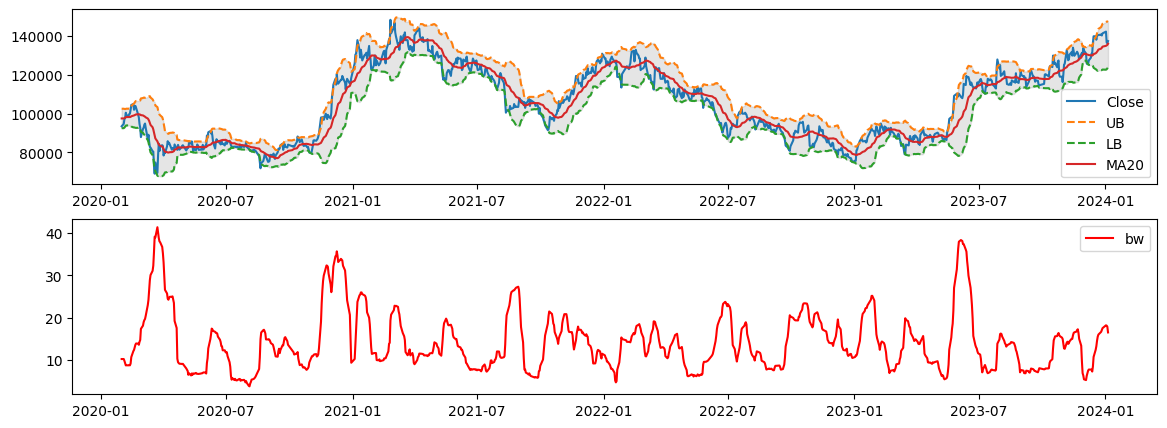

In [ ]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df['MA20'] = df.Close.rolling(window=20).mean()
df['STD'] = df.Close.rolling(window=20).std()
df['UB'] = df.MA20 + df.STD * 2
df['LB'] = df.MA20 - df.STD * 2
df['pct_b'] = (df.Close - df.LB) / (df.UB - df.LB)
df['bw'] = (df.UB - df.LB) / df.MA20 * 100
df.dropna(inplace=True)

plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='UB')
plt.plot(df.index, df.LB, linestyle='--', label='LB')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='gray', alpha=0.2)
plt.legend()

plt.subplot(212)
plt.plot(df.index, df.bw, label='bw', color='red')
plt.legend()

plt.show()

## 2.3 Trend-Follwing
- %b > 0.8 and MFI > 80 : Long
- %b < 0.2 and MFI < 20 : Short

- MFI = 100 - (100 / (1+PMF/NMF))
  - PMF : positive money flow (중심가격이 전일보다 상승한 날들의 MF 합)
  - NMF : negative money flow (중심가격이 전일보다 하락한 날들의 MF 합)
  - typical price : high, low, close average
  - money flow

In [ ]:
df['TP'] = (df.Close + df.High + df.Low)/3
df['PMF'] = 0
df['NMF'] = 0
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF
Date,,,,,,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474,0.097586,10.292615,94833.333333,0,0
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474,0.217115,10.292615,93933.333333,0,0
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569,0.440857,9.867649,96366.666667,0,0
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988,0.484618,9.302371,97966.666667,0,0
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173,0.770348,8.798484,99933.333333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,134630.0,5911.994943,146453.989887,122806.010113,0.790511,17.565164,140866.666667,0,0
2024-01-02,139700,142800,139700,142400,2147458,0.006360,135055.0,6157.193055,147369.386110,122740.613890,0.798228,18.236105,141633.333333,0,0
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,135265.0,6140.656145,147546.312291,122983.687709,0.562493,18.158891,138133.333333,0,0


In [ ]:
# calculate PMF and NMF
for i in range(len(df.Close)-1):
  if df.TP.values[i] < df.TP.values[i+1]:
    df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume[i+1]
    df.NMF.values[i+1] = 0

  elif df.TP.values[i] > df.TP.values[i+1]:
    df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume[i+1]
    df.PMF.values[i+1] = 0

In [ ]:
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF
Date,,,,,,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474,0.097586,10.292615,94833.333333,0,0
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474,0.217115,10.292615,93933.333333,0,349951921000
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569,0.440857,9.867649,96366.666667,305457567100,0
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988,0.484618,9.302371,97966.666667,285278443500,0
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173,0.770348,8.798484,99933.333333,285953337266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,134630.0,5911.994943,146453.989887,122806.010113,0.790511,17.565164,140866.666667,346457763266,0
2024-01-02,139700,142800,139700,142400,2147458,0.006360,135055.0,6157.193055,147369.386110,122740.613890,0.798228,18.236105,141633.333333,304151634733,0
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,135265.0,6140.656145,147546.312291,122983.687709,0.562493,18.158891,138133.333333,0,450013536000


In [ ]:
df['MFI'] = 100 - 100 / (1 + df.PMF.rolling(20).sum() / df.NMF.rolling(20).sum()) # rolling period 20 days
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF,MFI
Date,,,,,,,,,,,,,,,,
2020-02-27,94700,95300,92200,92800,4644449,-0.019027,99515.0,3679.999285,106874.998570,92155.001430,0.043818,14.791737,93433.333333,0,433946351566,38.847765
2020-02-28,91000,92200,87700,87900,8171939,-0.052802,99235.0,4319.268335,107873.536669,90596.463331,-0.156072,17.410262,89266.666667,0,729481754733,34.622360
2020-03-02,90000,93100,88300,92100,6382279,0.047782,99105.0,4498.359350,108101.718700,90108.281300,0.110691,18.155933,91166.666667,581851102166,0,41.850887
2020-03-03,95000,95100,92400,92800,5573006,0.007600,98890.0,4697.580564,108285.161129,89494.838871,0.175897,19.001236,93433.333333,520704527266,0,43.600482
2020-03-04,91300,95000,91300,94300,4984561,0.016164,98720.0,4803.244517,108326.489035,89113.510965,0.269947,19.462093,93533.333333,466222605533,0,44.991810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,140900,141600,139500,141500,2459473,0.007835,134630.0,5911.994943,146453.989887,122806.010113,0.790511,17.565164,140866.666667,346457763266,0,65.865161
2024-01-02,139700,142800,139700,142400,2147458,0.006360,135055.0,6157.193055,147369.386110,122740.613890,0.798228,18.236105,141633.333333,304151634733,0,65.173556
2024-01-03,140000,140800,136800,136800,3257820,-0.039326,135265.0,6140.656145,147546.312291,122983.687709,0.562493,18.158891,138133.333333,0,450013536000,65.407229


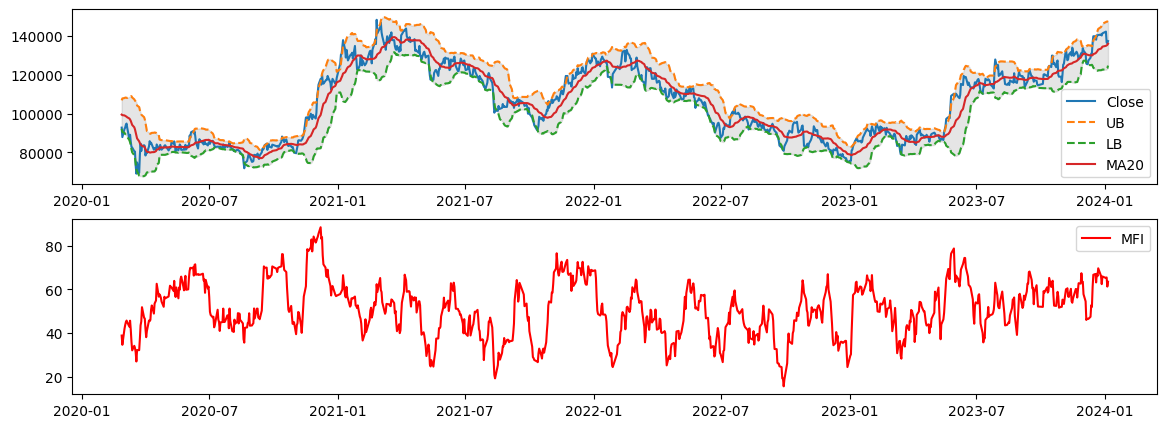

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='UB')
plt.plot(df.index, df.LB, linestyle='--', label='LB')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='gray', alpha=0.2)
plt.legend()

plt.subplot(212)
plt.plot(df.index, df.MFI, label='MFI', color='red')
plt.legend()

plt.show()

- %b > 0.8 and MFI > 80 : Long
- %b < 0.2 and MFI < 20 : Short

In [ ]:
df.loc[df.pct_b > 0.8].loc[df.MFI > 80]

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF,MFI
Date,,,,,,,,,,,,,,,,
2020-11-24,101000,102000,98300,98600,3766043,-0.014000,89305.0,7221.712510,103748.425020,74861.574980,0.821773,32.346285,99633.333333,375223417566,0,82.812491
2020-12-02,103000,109500,103000,109000,7488361,0.084577,94990.0,6480.895000,107951.790000,82028.210000,1.040435,27.290852,107166.666667,802502687166,0,83.276042
2020-12-03,110500,114500,109000,111500,6617912,0.022936,96260.0,7105.698232,110471.396465,82048.603535,1.036189,29.527107,111666.666667,739000173333,0,84.100596
2020-12-04,116000,119500,112500,115000,8258814,0.031390,97695.0,7847.659725,113390.319450,81999.680550,1.051279,32.131265,115666.666667,955269486000,0,85.401566
2020-12-07,118500,120000,116000,118000,5191354,0.026087,99295.0,8566.917704,116428.835408,82161.164592,1.045850,34.510973,118000.000000,612579772000,0,88.382663
2020-12-08,118000,118000,114000,115000,4536460,-0.025424,100720.0,8695.951871,118111.903743,83328.096257,0.910536,34.535154,115666.666667,0,524717206666,83.099902
2020-12-09,116000,121000,115000,120500,5490760,0.047826,102395.0,9129.678325,120654.356650,84135.643350,0.995773,35.664547,118833.333333,652485313333,0,83.834746


In [ ]:
df.loc[df.pct_b < 0.2].loc[df.MFI < 20]

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF,MFI
Date,,,,,,,,,,,,,,,,
2021-08-13,99600,101500,98900,101500,11622957,0.009950,114850.0,5909.626402,126669.252804,103030.747196,-0.064757,20.582068,100633.333333,0,1169656906100,19.266735
2022-09-27,82200,82700,80700,82000,2606333,-0.006061,89985.0,3845.198647,97675.397293,82294.602707,-0.019154,17.092621,81800.000000,0,213198039400,19.248265
2022-09-28,81900,83500,80500,81200,3068181,-0.009756,89420.0,4263.628304,97947.256608,80892.743392,0.018016,19.072370,81733.333333,0,250772660400,19.210845
2022-09-29,82500,82900,80500,80800,2064798,-0.004926,88800.0,4575.219293,97950.438586,79649.561414,0.062862,20.609096,81400.000000,0,168074557200,15.633240


In [ ]:
long_cond = df.loc[df.pct_b > 0.8].loc[df.MFI > 80]
short_cond = df.loc[df.pct_b < 0.2].loc[df.MFI < 20]

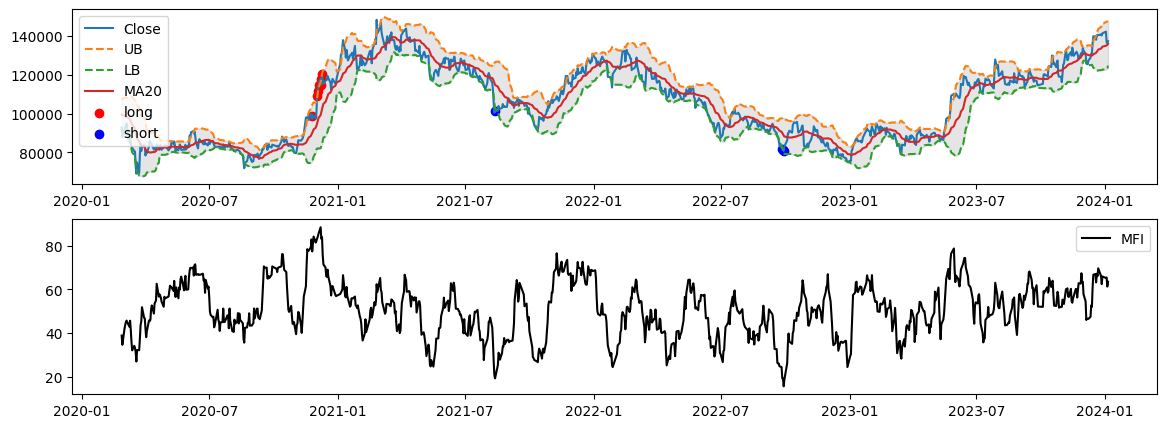

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='UB')
plt.plot(df.index, df.LB, linestyle='--', label='LB')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='gray', alpha=0.2)
plt.scatter(long_cond.index, long_cond.Close, label='long', color='red')
plt.scatter(short_cond.index, short_cond.Close, label='short', color='blue')
plt.legend()

plt.subplot(212)
plt.plot(df.index, df.MFI, label='MFI', color='black')
plt.legend()

plt.show()